# 埃特肯法求方程解

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def f(x):
    return x**3 - x**2 - 1

<!-- 构造迭代函数 -->

## 构造迭代函数

$$
\begin{aligned}
x^{3} - x^{2} - 1 &= 0 \\
x = \sqrt{x^{3} - 1} \\
\end{aligned}


$$

令$\varphi(x) = \sqrt{x^{3} - 1}$为迭代公式


In [2]:
def phi(x):
    return (x**3 - 1)**(1/2)

In [13]:
# x0 = 1.5 # 初始值
x1 = phi(x0)
# 只保留小数点后 5 位，制造舍入误差
x1 = np.round(x1, 5)
x2 = phi(x1)
x2 = np.round(x2, 5)
theta = (x2 - x1)/(x1 - x0)
theta = np.round(theta, 5)
x0 = (phi(x0) - theta * x0)/(1 - theta) 
x0 = np.round(x0, 5)
print(x0)

nan


C:\Users\dongl\AppData\Local\Temp/ipykernel_13624/3749070165.py:7: RuntimeWarning: invalid value encountered in double_scalars
  theta = (x2 - x1)/(x1 - x0)


C:\Users\dongl\AppData\Local\Temp/ipykernel_13624/3223463851.py:2: RuntimeWarning: invalid value encountered in sqrt
  return (x**3 - 1)**(1/2)


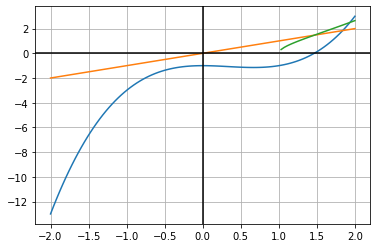

In [8]:
x = np.linspace(-2, 2, 100)
plt.plot(x, f(x))
plt.plot(x, x)
plt.plot(x, phi(x))
# 显示坐标轴
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
# 显示网格
plt.grid()
plt.show()

In [20]:
x0 = 1.5 # 初始值
while True:
    x1 = phi(x0)
    if abs(x1 - x0) < 1e-12:
        break
    x2 = phi(x1)
    theta = (x2 - x1)/(x1 - x0)
    x0 = (phi(x0) - theta * x0)/(1 - theta) 
    print(x0)


1.465365431478883
1.4655712202898679
1.4655712318767682


## 选取其它迭代函数

$$
\begin{aligned}
x^{3} - x^{2} - 1 &= 0 \\
x = {(x^{2} + 1)} ^ {\frac{1}{3}} \\ 
\end{aligned}
$$

令$\psi(x) = {(x^{2} + 1)} ^ {\frac{1}{3}}$为迭代公式 

In [17]:
# define other iteration methods
def psi(x):
    return (x**2 + 1)**(1/3)

In [19]:
x0 = 1.5 # 初始值
while True:
    x1 = psi(x0)
    if abs(x1 - x0) < 1e-12:
        break
    x2 = psi(x1)
    theta = (x2 - x1)/(x1 - x0)
    x0 = (psi(x0) - theta * x0)/(1 - theta) 
    print(x0)

1.4655584829667796
1.4655712318748688
1.4655712318767682


我们可以看到，$\varphi(x)$和 $\psi(x)$ 的选取对迭代次数并没有明显的改善，个人认为应该是初值选取的太好了，导致迭代次数很少。下面我们来看一下不同初值的迭代次数。

## 选取初值


### 重新构造埃特肯 aitken函数

In [21]:
# aitken method
def aitken(x0, func = lambda x0 : x0 , eps = 1e-4 ,isprint=True):
    x0 = 1.5 # 初始值
    while True:
        x1 = func(x0)
        if abs(x1 - x0) < eps:
            break
        x2 = func(x1)
        theta = (x2 - x1)/(x1 - x0)
        x0 = (func(x0) - theta * x0)/(1 - theta) 
        print(x0)

In [23]:
aitken(1.5, phi, 1e-12)

1.465365431478883
1.4655712202898679
1.4655712318767682


### 观察不同初值的迭代次数

In [33]:
aitken(1, psi, 1e-12)

1.4655584829667796
1.4655712318748688
1.4655712318767682


In [34]:
aitken(1, phi, 1e-12)

1.465365431478883
1.4655712202898679
1.4655712318767682


## 更多迭代函数（free time~~~）

<!-- 定义其它迭代函数看一下效果 -->
$x^{3} - x^{2} - 1 = 0$经过简单的变换可以得到下面的迭代函数

$$
\begin{aligned}
x &= x^{2} - \frac{1}{x} \\
x &= \frac{1}{(x - 1)^{\frac{1}{2}}} \\
x &= 1 + \frac{1}{x^{2}} \\
\end{aligned}
$$

```python
def f1(x):
    return x**2 - 1/x
def f2(x):
    return 1/((x-1)**0.5)
def f3(x):
    return 1 + 1/x**2
```

In [29]:
def f1(x):
    return x**2 - 1/x
def f2(x):
    return 1/((x-1)**0.5)
def f3(x):
    return 1 + 1/x**2

In [30]:
aitken(1, f1, 1e-12)

1.466725043782837
1.4655725197594736
1.465571231878372
1.465571231876768


In [31]:
aitken(1, f2, 1e-12)

1.4673422863283745
1.4655760852065471
1.4655712319132883
1.465571231876768


In [32]:
aitken(1, f3, 1e-12)

1.465858585858586
1.4655712527301703
1.4655712318767682


## 总结

虽然这只是数值分析的一道题但总体来说，觉得这门课如果设置成一门实践课可能也有好处，不过现在这样自己探索真的好有意思，也让我对这门课有了更深的理解。
